# Machine Learning Demonstrations - 1

To run this notebook, you need to install python dependencies:

Install tensorflow:

With conda:

``conda install -c conda-forge tensorflow``

With pip:

```pip install tensorflow```

>  If you have a GPU in your computer, you can better install the gpu version to speed up some computations by following the instructions in this link: https://www.tensorflow.org/install/

Other dependencies:

With pip:

```pip install Keras==2.0.9
pip install scikit_learn==0.19.1```

## Classification using Neural Networks

Neural Networks are machine learning models based (loosely) on biological neural networks in the brain. Data is passed through a series of layers of *artificial neurons* , giving increasingly useful representations. Since the number of  layers can be quite large, this type of machine learning is often called *deep learning*.

Neural networks can
- Work on data with little-or-no feature engineering applied
- Be applied to *perceptive* problems (such as computer vision and voice recognition)

We will implement and manipulate Neural Networks using **Keras**, a high-level API that runs on top of a number of common deep learning frameworks, including TensorFlow, Theano and CNTK.

Further discussion of Neural Networks can be found on the [Wikipedia article](https://en.wikipedia.org/wiki/Artificial_neural_network). More information about the Keras framework can be found on the [Keras website](https://keras.io/).

## MNIST (handwritten digits) database

The Modified National Institute of Standards and Technology (MNIST) database, is a large collection of handwritten digits.

MNIST is commonly used for training and testing image processing systems, particularly in the field of machine learning.

<img src="../images/mnist.png" />

### Load data

In [1]:
/ Utility functions
\l ../utils/funcs.q
\l ../utils/graphics.q

In [2]:
mnist:.p.import[`keras.datasets.mnist][`:load_data;<][]
data:raze(`xtrain`ytrain;`xtest`ytest)!'mnist
@[`data;`ytrain`ytest;"f"$];
/ Inspect data
-1 string[count data`xtrain]," samples of shape ",sv[" x "]string 1_shape data`xtrain;
-1"";show 5#data`xtrain;-1"";
-1"Distribution of target values is:\n";
show update pcnt:round[;.01]100*num%sum num from select num:count i by target from([]target:data`ytrain);
-1"\nTraining/test split is:\n";
show count each data;

Using TensorFlow backend.


60000 samples of shape 28 x 28

0x00000000000000000000000000000000000000000000000000000000 0x0000000000000000..
0x00000000000000000000000000000000000000000000000000000000 0x0000000000000000..
0x00000000000000000000000000000000000000000000000000000000 0x0000000000000000..
0x00000000000000000000000000000000000000000000000000000000 0x0000000000000000..
0x00000000000000000000000000000000000000000000000000000000 0x0000000000000000..

Distribution of target values is:

target| num  pcnt 
------| ----------
0     | 5923 9.87 
1     | 6742 11.24
2     | 5958 9.93 
3     | 6131 10.22
4     | 5842 9.74 
5     | 5421 9.04 
6     | 5918 9.86 
7     | 6265 10.44
8     | 5851 9.75 
9     | 5949 9.92 

Training/test split is:

xtrain| 60000
ytrain| 60000
xtest | 10000
ytest | 10000


### Inspect a random digit

In [3]:
\c 2000 2000
j:rand count data`xtest; / pick a number
-1"Inpecting data point ",string j;-1"";
show data[`xtest]j;-1"";
-1"Length: ",string count data[`xtest]j;
\c 16 80

Inpecting data point 5480

0x00000000000000000000000000000000000000000000000000000000
0x00000000000000000000000000000000000000000000000000000000
0x00000000000000000000000000000000000000000000000000000000
0x00000000000000000000000000000000000000000000000000000000
0x0000000000000000000000000000000000000003204cdf9603000000
0x00000000000000000000000000000000000864dcfefefefc08000000
0x00000000000000000000000000001361a6f4fefef7c06c3500000000
0x000000000000000000000000128bdafefefee36c1e00000000000000
0x000000000000000000000279dafefefbbf6a1f000000000000000000
0x0000000000000000000039fefef3bd43000000000000000000000000
0x0000000000000000000073fecc310000000000000000000000000000
0x00000000000000000000bcfe8d000000000000000000000000000000
0x00000000000000000036f2fe8d000000000000000000000000000000
0x000000000000000003b5fef22d000000000000000000000000000000
0x000000000000000053fefeea1a000000000000000000000000000000
0x000000000000000061fefefeeeb35f09000000000000000000000000
0x00000000000000000d7fc8cdfef

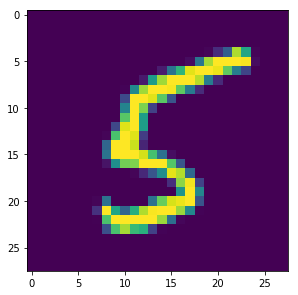

In [4]:
@[`data;`xtrain`xtest;%;255];
/ Display using matplotlib
plt[`:imshow]"f"$data[`xtest]j;
plt[`:show][];

### Inspect a random sample

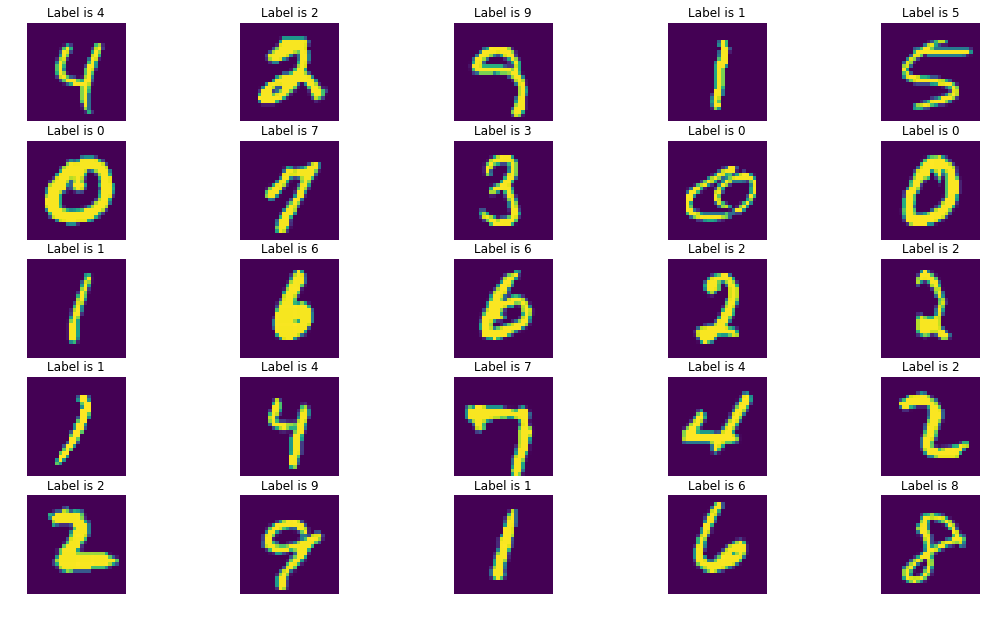

In [5]:
subplots:plt[`:subplots][5;5]
fig:subplots[@;0]
axarr:subplots[@;1]
fig[`:set_size_inches;18.5;10.5];

{ i:rand count data`xtest;
  box:axarr[`$":__getitem__"].p.eval","sv string x;
  box[`:imshow]"f"$data[`xtest]i;
  box[`:axis]`off;
  box[`:set_title]"Label is ",string data[`ytest]i;
 }each cross[til 5;til 5];

plt[`:show][];

### Build model

In [6]:
/ Prepare data for NN model
@[`data;`xtrain`xtest;{nparray[(raze/)x][`:reshape]count[x],28*28}];
@[`data;`ytrain`ytest;{nparray onehot x}];

In [7]:
/ Layer used in model
dense:.p.import[`keras.layers]`:Dense;

In [8]:
/ Build the model
model:.p.import[`keras.models;`:Sequential][];
model[`:add][dense[512;`activation pykw`relu;`input_shape pykw enlist 28*28]];
model[`:add]dense[10;`activation pykw`softmax];
model[`:compile][`loss pykw`categorical_crossentropy;`optimizer pykw`rmsprop;`metrics pykw pylist enlist`accuracy];
model[`:summary][];

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### Fit model

In [9]:
epochs:20
batchsz:128
start:.z.T
cresults:model[`:fit][data`xtrain;data`ytrain;`batch_size pykw batchsz;`verbose pykw 2;`epochs pykw epochs]
-1"Training continuous model for ",string[epochs]," epochs took ",string .z.T-start;

Epoch 1/20
 - 4s - loss: 0.2537 - acc: 0.9263
Epoch 2/20
 - 3s - loss: 0.1037 - acc: 0.9690
Epoch 3/20
 - 3s - loss: 0.0684 - acc: 0.9795
Epoch 4/20
 - 4s - loss: 0.0495 - acc: 0.9852
Epoch 5/20
 - 4s - loss: 0.0379 - acc: 0.9884
Epoch 6/20
 - 3s - loss: 0.0282 - acc: 0.9915
Epoch 7/20
 - 4s - loss: 0.0224 - acc: 0.9935
Epoch 8/20
 - 3s - loss: 0.0174 - acc: 0.9951
Epoch 9/20
 - 4s - loss: 0.0133 - acc: 0.9959
Epoch 10/20
 - 3s - loss: 0.0097 - acc: 0.9974
Epoch 11/20
 - 3s - loss: 0.0076 - acc: 0.9981
Epoch 12/20
 - 3s - loss: 0.0062 - acc: 0.9983
Epoch 13/20
 - 4s - loss: 0.0050 - acc: 0.9986
Epoch 14/20
 - 3s - loss: 0.0039 - acc: 0.9990
Epoch 15/20
 - 3s - loss: 0.0028 - acc: 0.9993
Epoch 16/20
 - 3s - loss: 0.0024 - acc: 0.9995
Epoch 17/20
 - 3s - loss: 0.0021 - acc: 0.9995
Epoch 18/20
 - 4s - loss: 0.0015 - acc: 0.9996
Epoch 19/20
 - 3s - loss: 0.0012 - acc: 0.9998
Epoch 20/20
 - 3s - loss: 0.0013 - acc: 0.9997
Training continuous model for 20 epochs took 00:01:10.445


### Predicting

In [10]:
preds:first each idesc each model[`:predict][data`xtest]`;
class:first each where each 1=data[`ytest]`;
show res:update Hit:Class=Prediction from([]Class:class;Prediction:preds)

Class Prediction Hit
--------------------
7     7          1  
2     2          1  
1     1          1  
0     0          1  
4     4          1  
1     1          1  
4     4          1  
9     9          1  
5     5          1  
9     9          1  
0     0          1  
..


### Analysing accuracy

In [11]:
tot:select avg Hit by`$string Class from res;
show update Miss:1-Hit from tot upsert update Class:`TOTAL from select avg Hit from res;

Class| Hit       Miss       
-----| ---------------------
0    | 0.9918367 0.008163265
1    | 0.9894273 0.01057269 
2    | 0.9835271 0.01647287 
3    | 0.9821782 0.01782178 
4    | 0.9826884 0.01731161 
5    | 0.9764574 0.0235426  
6    | 0.9832985 0.01670146 
7    | 0.979572  0.02042802 
8    | 0.973306  0.02669405 
9    | 0.9821606 0.01783944 
TOTAL| 0.9826    0.0174     


In [12]:
ctab:update pcnt:100*num%sum num by Class from select num:count i by Class,Prediction from res
ctab:0^(asc flip`Class`Prediction!flip cross[exec distinct Class from ctab;exec distinct Prediction from ctab])#ctab
ctab:0!update p:{`$"Pred_",string x}each Prediction from ctab
show cpivot:exec(p!num)by Class:Class from ctab

Class| Pred_0 Pred_1 Pred_2 Pred_3 Pred_4 Pred_5 Pred_6 Pred_7 Pred_8 Pred_9
-----| ---------------------------------------------------------------------
0    | 972    0      0      1      1      1      2      1      2      0     
1    | 0      1123   3      1      0      2      2      1      3      0     
2    | 3      1      1015   2      1      0      2      3      4      1     
3    | 1      0      3      992    0      3      0      3      1      7     
4    | 1      0      2      0      965    0      4      3      0      7     
5    | 2      0      0      9      1      871    2      2      4      1     
6    | 4      2      2      1      3      3      942    1      0      0     
7    | 0      1      8      1      2      0      0      1007   4      5     
8    | 5      0      3      2      4      2      2      4      948    4     
9    | 2      3      0      2      5      1      0      4      1      991   


### Visualising Accuracy (3D plot)

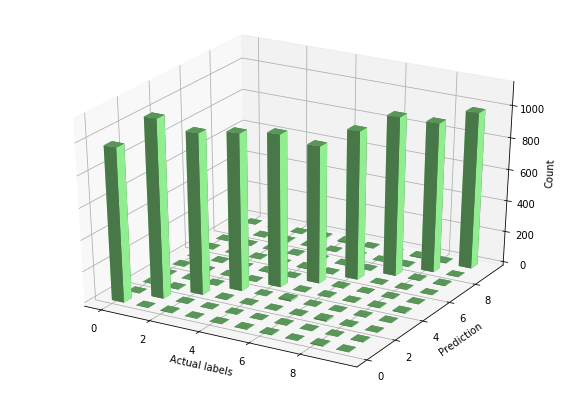

In [13]:
/ Import matplotlib and library that allows 3D plots
.p.import[`mpl_toolkits.mplot3d]`:Axes3D;

/ Initialize plot
fig:plt[`:figure][`figsize pykw 10 7];
ax:fig[`:add_subplot][111;`projection pykw"3d"];

/ Definition of 3D barplots
n:count ctab;
ax[`:bar3d][ctab.Class;ctab.Prediction;n#0;n#0.5;n#0.5;ctab.num;`color pykw "lightgreen"];
ax[`:set_xlabel]["Actual labels"];
ax[`:set_ylabel]["Prediction"];
ax[`:set_zlabel]["Count"];
plt[`:show][];

### Visualising Accuracy (Heatmap)

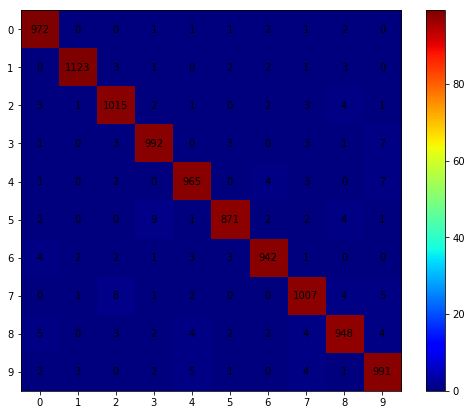

In [14]:
Norm_conf:flip value flip value exec(p!pcnt)by Class from ctab
fig:plt[`:figure][`figsize pykw 9 7];
ax:fig[`:add_subplot][111];
ax[`:set_aspect][1];

orig_cmap:plt[`:get_cmap][];
plt[`:set_cmap]"jet";
resIm:ax[`:imshow][Norm_conf;`interpolation pykw`nearest];
ax[`:imshow][Norm_conf;`interpolation pykw`nearest];
ax[`:annotate][;;`horizontalalignment pykw`center; `verticalalignment pykw`center]'[string ctab`num;flip ctab`Prediction`Class];

/ Customize plot
fig[`:colorbar]resIm;
plt[`:xticks]til 10;
plt[`:yticks]til 10;
plt[`:show][];
plt[`:set_cmap]orig_cmap;

### Where are mistakes made?

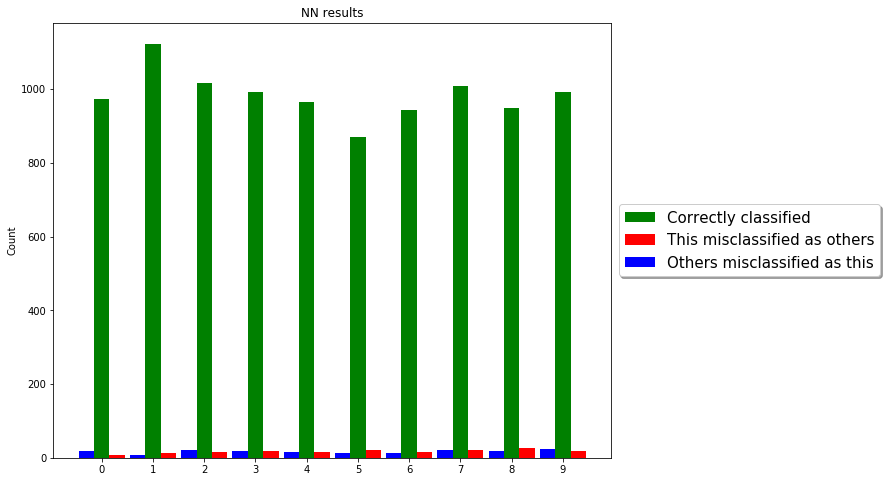

In [15]:
ind:til count cmat:flip value flip value cpivot
mclass:(corr;(sum each cmat)-corr;(sum each flip cmat)-corr:cmat ./:2#'til count cmat)
width:0.3
/ We initialize the plot
ax:plt[`:subplots][`figsize pykw 10 8][@;1]
/ Adding the bars related to the correct classifications (in green)
ax[`:bar][ind;mclass 0;width;`color pykw"g";`label pykw"Correctly classified"];
ax[`:bar][ind+width;mclass 1;width;`color pykw"r";`label pykw"This misclassified as others"];
ax[`:bar][ind-width;mclass 2;width;`color pykw"b";`label pykw"Others misclassified as this"];

ax[`:set_ylabel]"Count";
ax[`:set_title]"NN results";
ax[`:set_xticks]ind;
ax[`:set_xticklabels]ind;
ax[`:legend][`loc pykw"center left";`shadow pykw 1b;`bbox_to_anchor pykw(1,0.5);`fontsize pykw 15];
plt[`:show][];

### Check mistakes

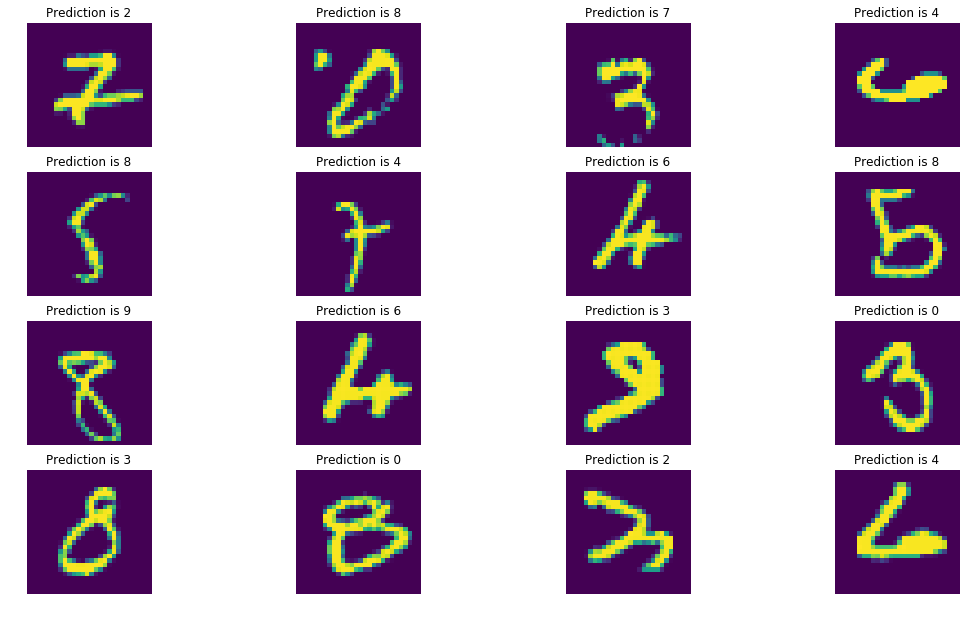

In [16]:
mistakes:16?exec i from res where not Hit

subplots:plt[`:subplots][4;4]
fig:subplots[@;0]
axarr:subplots[@;1]
fig[`:set_size_inches][18.5;10.5];

{[x;i]
  box:axarr[`$":__getitem__"].p.eval","sv string x;
  box[`:imshow]28 28#255*data[`xtest][`]i;
  box[`:axis]`off;
  box[`:set_title]["Prediction is ",string res[i;`Prediction]];
 }'[cross[til 4;til 4];mistakes];

plt[`:show][];